In [8]:
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
fpl_api = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [10]:
r = requests.get(fpl_api)

In [11]:
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [12]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [13]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,None,58822,0,0,0,0,0,2,2.3,...,239,80,199,63,2.0,,3.0,,NaN,
1,NaN,None,80201,0,0,0,0,0,1,2.7,...,397,27,346,24,NaN,,NaN,,NaN,
2,NaN,None,84450,0,0,0,0,0,3,2.0,...,148,85,102,63,NaN,,NaN,,NaN,
3,NaN,None,153256,0,0,0,0,0,3,1.5,...,291,145,286,130,NaN,,NaN,,NaN,
4,NaN,None,156074,0,0,0,0,0,2,2.3,...,292,112,295,107,NaN,,NaN,,NaN,


In [14]:
elements_df.columns


Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [15]:
slim_elements_df = elements_df[['first_name', 'second_name', 'element_type', 'team', 'now_cost', 'points_per_game', 'selected_by_percent', 'total_points', 'transfers_in', 'transfers_out', 'value_season']]

In [16]:
slim_elements_df.head()

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season
0,Cédric,Alves Soares,2,1,45,2.3,0.3,48,0,0,10.7
1,Bernd,Leno,1,1,45,2.5,0.8,10,0,0,2.2
2,Granit,Xhaka,3,1,50,2.2,0.5,60,0,0,12.0
3,Mohamed,Elneny,3,1,45,1.9,1.2,27,0,0,6.0
4,Rob,Holding,2,1,45,1.9,0.2,29,0,0,6.4


In [17]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\Users\ashea\AppData\Local\Temp\ipykernel_14704\1996727139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [18]:
slim_elements_df.head()

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season,position
0,Cédric,Alves Soares,2,1,45,2.3,0.3,48,0,0,10.7,Defender
1,Bernd,Leno,1,1,45,2.5,0.8,10,0,0,2.2,Goalkeeper
2,Granit,Xhaka,3,1,50,2.2,0.5,60,0,0,12.0,Midfielder
3,Mohamed,Elneny,3,1,45,1.9,1.2,27,0,0,6.0,Midfielder
4,Rob,Holding,2,1,45,1.9,0.2,29,0,0,6.4,Defender


In [19]:
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

In [20]:
slim_teams_df = teams_df[['name']]

In [21]:
slim_teams_df.head()

,name
0,Arsenal
1,Aston Villa
2,Bournemouth
3,Brentford
4,Brighton


In [22]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\ashea\AppData\Local\Temp\ipykernel_14704\2815011068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [23]:
slim_elements_df.head()

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season,position
0,Cédric,Alves Soares,2,Arsenal,45,2.3,0.3,48,0,0,10.7,Defender
1,Bernd,Leno,1,Arsenal,45,2.5,0.8,10,0,0,2.2,Goalkeeper
2,Granit,Xhaka,3,Arsenal,50,2.2,0.5,60,0,0,12.0,Midfielder
3,Mohamed,Elneny,3,Arsenal,45,1.9,1.2,27,0,0,6.0,Midfielder
4,Rob,Holding,2,Arsenal,45,1.9,0.2,29,0,0,6.4,Defender


In [24]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [25]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

C:\Users\ashea\AppData\Local\Temp\ipykernel_14704\505541812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


In [26]:
slim_elements_df.sort_values('value',ascending=False)

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season,position,value
301,Alisson,Ramses Becker,1,Liverpool,55,4.9,19.5,176,0,0,32.0,Goalkeeper,32.0
43,Matty,Cash,2,Aston Villa,50,3.9,20.6,147,0,0,29.4,Defender,29.4
15,Gabriel,dos Santos Magalhães,2,Arsenal,50,4.2,8.6,146,0,0,29.2,Defender,29.2
517,José,Malheiro de Sá,1,Wolves,50,3.9,4.8,146,0,0,29.2,Goalkeeper,29.2
460,Hugo,Lloris,1,Spurs,55,4.2,4.9,158,0,0,28.7,Goalkeeper,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Sven,Botman,2,Newcastle,45,0.0,2.8,0,0,0,0.0,Defender,0.0
403,Harry,Arter,3,Nott'm Forest,45,0.0,0.3,0,0,0,0.0,Midfielder,0.0
404,Steve,Cook,2,Nott'm Forest,45,0.0,0.2,0,0,0,0.0,Defender,0.0
405,Lyle,Taylor,4,Nott'm Forest,45,0.0,12.0,0,0,0,0.0,Forward,0.0


In [27]:
slim_elements_df.pivot_table (index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,9.719388
1,Forward,7.418644
2,Goalkeeper,9.698077
3,Midfielder,8.558952


In [28]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,9.719388
2,Goalkeeper,9.698077
3,Midfielder,8.558952
1,Forward,7.418644


In [29]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [30]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,15.281818
0,Defender,13.229167
3,Midfielder,11.395349
1,Forward,10.675610


In [31]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
17,West Ham,15.622222
11,Man City,14.852632
10,Liverpool,14.833333
16,Spurs,14.512500
5,Chelsea,14.436000
0,Arsenal,13.116667
4,Brighton,13.000000
6,Crystal Palace,12.654545
3,Brentford,12.513043
18,Wolves,12.380952


In [32]:
gk_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']

<AxesSubplot:>

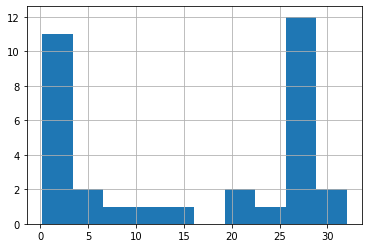

In [33]:
gk_df.value.hist()

In [34]:
gk_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season,position,value
301,Alisson,Ramses Becker,1,Liverpool,55,4.9,19.5,176,0,0,32.0,Goalkeeper,32.0
517,José,Malheiro de Sá,1,Wolves,50,3.9,4.8,146,0,0,29.2,Goalkeeper,29.2
460,Hugo,Lloris,1,Spurs,55,4.2,4.9,158,0,0,28.7,Goalkeeper,28.7
330,Ederson,Santana de Moraes,1,Man City,55,4.2,16.3,155,0,0,28.2,Goalkeeper,28.2
120,Robert,Sánchez,1,Brighton,45,3.4,13.4,126,0,0,28.0,Goalkeeper,28.0
492,Lukasz,Fabianski,1,West Ham,50,3.7,1.3,136,0,0,27.2,Goalkeeper,27.2
14,Aaron,Ramsdale,1,Arsenal,50,4.0,12.6,135,0,0,27.0,Goalkeeper,27.0
349,David,De Gea Quintana,1,Man Utd,50,3.5,7.5,132,0,0,26.4,Goalkeeper,26.4
161,Vicente,Guaita,1,Crystal Palace,45,4.0,1.8,119,0,0,26.4,Goalkeeper,26.4
239,Kasper,Schmeichel,1,Leicester,50,3.5,1.9,131,0,0,26.2,Goalkeeper,26.2


<AxesSubplot:>

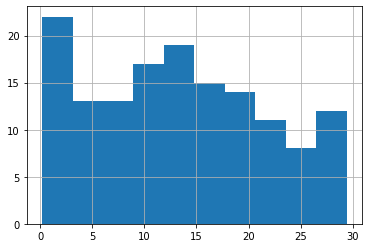

In [35]:
def_df.value.hist()

In [36]:
def_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season,position,value
43,Matty,Cash,2,Aston Villa,50,3.9,20.6,147,0,0,29.4,Defender,29.4
15,Gabriel,dos Santos Magalhães,2,Arsenal,50,4.2,8.6,146,0,0,29.2,Defender,29.2
329,João,Cancelo,2,Man City,70,5.6,45.1,201,0,0,28.7,Defender,28.7
296,Joel,Matip,2,Liverpool,60,5.5,2.7,170,0,0,28.3,Defender,28.3
300,Virgil,van Dijk,2,Liverpool,65,5.4,13.4,183,0,0,28.2,Defender,28.2
305,Trent,Alexander-Arnold,2,Liverpool,75,6.5,57.8,208,0,0,27.7,Defender,27.7
174,Joachim,Andersen,2,Crystal Palace,45,3.6,2.8,124,0,0,27.6,Defender,27.6
514,Conor,Coady,2,Wolves,50,3.6,5.0,138,0,0,27.6,Defender,27.6
176,Marc,Guéhi,2,Crystal Palace,45,3.4,2.5,123,0,0,27.3,Defender,27.3
81,Pontus,Jansson,2,Brentford,45,3.3,2.6,122,0,0,27.1,Defender,27.1


<AxesSubplot:>

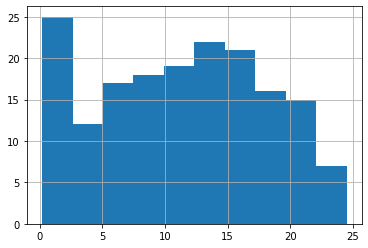

In [37]:
mid_df.value.hist()

In [38]:
mid_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season,position,value
440,James,Ward-Prowse,3,Southampton,65,4.4,9.7,159,0,0,24.5,Midfielder,24.5
502,Jarrod,Bowen,3,West Ham,85,5.7,7.9,206,0,0,24.2,Midfielder,24.2
155,Conor,Gallagher,3,Chelsea,60,4.1,2.3,140,0,0,23.3,Midfielder,23.3
501,Saïd,Benrahma,3,West Ham,60,4.3,2.6,138,0,0,23.0,Midfielder,23.0
252,James,Maddison,3,Leicester,80,5.2,5.4,181,0,0,22.6,Midfielder,22.6
12,Bukayo,Saka,3,Arsenal,80,4.7,21.3,179,0,0,22.4,Midfielder,22.4
334,Bernardo,Veiga de Carvalho e Silva,3,Man City,70,4.4,8.2,155,0,0,22.1,Midfielder,22.1
118,Leandro,Trossard,3,Brighton,65,4.1,2.3,141,0,0,21.7,Midfielder,21.7
463,Son,Heung-min,3,Spurs,120,7.4,25.4,258,0,0,21.5,Midfielder,21.5
169,Wilfried,Zaha,3,Crystal Palace,70,4.5,7.6,150,0,0,21.4,Midfielder,21.4


<AxesSubplot:>

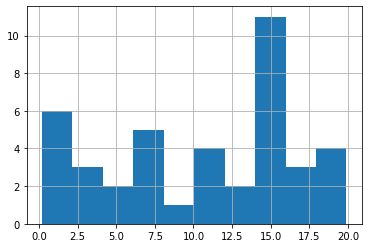

In [39]:
fwd_df.value.hist()

In [40]:
fwd_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,element_type,team,now_cost,points_per_game,selected_by_percent,total_points,transfers_in,transfers_out,value_season,position,value
83,Ivan,Toney,4,Brentford,70,4.2,5.3,139,0,0,19.9,Forward,19.9
98,Bryan,Mbeumo,4,Brentford,60,3.4,2.8,119,0,0,19.8,Forward,19.8
308,Diogo,Teixeira da Silva,4,Liverpool,90,5.0,1.3,175,0,0,19.4,Forward,19.4
495,Michail,Antonio,4,West Ham,75,3.9,4.6,140,0,0,18.7,Forward,18.7
40,Ollie,Watkins,4,Aston Villa,75,3.7,3.8,131,0,0,17.5,Forward,17.5
157,Armando,Broja,4,Chelsea,55,2.9,1.8,92,0,0,16.7,Forward,16.7
462,Harry,Kane,4,Spurs,115,5.2,26.2,192,0,0,16.7,Forward,16.7
444,Che,Adams,4,Southampton,65,3.4,0.8,103,0,0,15.8,Forward,15.8
175,Odsonne,Edouard,4,Crystal Palace,55,3.1,3.4,87,0,0,15.8,Forward,15.8
378,Chris,Wood,4,Newcastle,60,2.7,1.7,91,0,0,15.2,Forward,15.2
